In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [3]:
excel_file_path = 'D:\ExcelR Data Science\Project\Sentiment Analysis\sample_tweetdata.xlsx'
df = pd.read_excel(excel_file_path)

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,tweets,class,cleaned_tweets
0,@Arctic_Warlocks @mttgcast I find this so hila...,figurative,"['find', 'hilarious', 'much', 'talk', 'underst..."
1,@TannerStewart95 very true. Gosh I just can't ...,sarcasm,"['true', 'gosh', 'cannot', 'wait', 'sarcastic']"
2,Becky is saying I think I can I think I can I ...,irony,"['becky', 'saying', 'think', 'think', 'think',..."
3,Jared Fogle's dramatic weight loss from Subway...,sarcasm,"['jared', 'fogles', 'dramatic', 'weight', 'los..."
4,Oh how I love it when customers throw their mo...,figurative,"['oh', 'love', 'customer', 'throw', 'money', '..."


In [6]:
class_count=df['class'].value_counts()
class_count

irony         2626
figurative    2580
sarcasm       2549
regular       2245
Name: class, dtype: int64

In [7]:
label_encoder=LabelEncoder()
df['class']=label_encoder.fit_transform(df['class'])

In [8]:
updated_class_count1=df['class'].value_counts()
updated_class_count1

1    2626
0    2580
3    2549
2    2245
Name: class, dtype: int64

# Label Coders
     Irony encoded as 1
     regular encoded as 2
     sarcasm encoded as 3
     figurative encode as 0


In [9]:
y=df['class']


In [10]:
# Initialize TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words=None)
X_tfidf=tfidf_vectorizer.fit_transform(df['cleaned_tweets'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### Class count in test data

In [11]:
# Calculate the class counts in the test set
class_counts_test = dict(zip(*np.unique(y_test, return_counts=True)))

# Print the class counts in the test set
for class_label, count in class_counts_test.items():
    print(f"Class {class_label}: {count} instances")

Class 0: 498 instances
Class 1: 521 instances
Class 2: 464 instances
Class 3: 517 instances


In [12]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()
le.fit(X_train.toarray(),y_train)
le_ypred=le.predict(X_test.toarray())

D:\PythnCodes\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, le_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.723


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print('Classification_report',classification_report(y_test, le_ypred))

print('Confusion_Matrix:\n',confusion_matrix(y_test, le_ypred))

Classification_report               precision    recall  f1-score   support

           0       0.34      0.11      0.16       498
           1       0.68      0.92      0.78       521
           2       0.98      1.00      0.99       464
           3       0.68      0.87      0.76       517

    accuracy                           0.72      2000
   macro avg       0.67      0.72      0.67      2000
weighted avg       0.66      0.72      0.67      2000

Confusion_Matrix:
 [[ 54 226   3 215]
 [ 42 477   2   0]
 [  0   0 464   0]
 [ 62   0   4 451]]


In [15]:
le_conf_matrix=confusion_matrix(y_test, le_ypred)

In [16]:
def breakdown_matrix(conf_matrix):
    class_labels, class_counts_actual = np.unique(y_test, return_counts=True)
    class_counts_predicted = np.sum(conf_matrix, axis=1)
    print("\nClass Distribution in Actual Test Data:")
    
    for label, count_actual, count_predicted in zip(class_labels, class_counts_actual, class_counts_predicted):
        print(f"Class {label}: {count_actual} instances, Predicted {count_predicted} instances")

# Print a breakdown of the confusion matrix
    class_labels=['figurative','irony','regular','sarcasm']
    for i in range(len(class_labels)):
        print(f"\nClass {class_labels[i]} (Actual):")
        for j in range(len(class_labels)):
            if i == j:
                true_positives = conf_matrix[i, j]
                print(f"  Predicted as Class {class_labels[i]}: {true_positives} (True Positives)")
            else:
                false_positives = conf_matrix[i, j]
                false_negatives = np.sum(conf_matrix[j, :]) - conf_matrix[j, j]
                print(f"  Predicted as Class {class_labels[i]} but Actual Class {class_labels[j]}: {false_positives} (False Positives)")
                print(f"  Predicted as NOT Class {class_labels[i]} but Actual Class {class_labels[j]}: {false_negatives} (False Negatives)")

        total_actual = class_counts_actual[i]
        total_predicted = class_counts_predicted[i]
        print(f"  Total instances: {total_actual} (Actual), {total_predicted} (Predicted)")

### Logistic regression confusion Matrix Breakdown

In [17]:
breakdown_matrix(le_conf_matrix)


Class Distribution in Actual Test Data:
Class 0: 498 instances, Predicted 498 instances
Class 1: 521 instances, Predicted 521 instances
Class 2: 464 instances, Predicted 464 instances
Class 3: 517 instances, Predicted 517 instances

Class figurative (Actual):
  Predicted as Class figurative: 54 (True Positives)
  Predicted as Class figurative but Actual Class irony: 226 (False Positives)
  Predicted as NOT Class figurative but Actual Class irony: 44 (False Negatives)
  Predicted as Class figurative but Actual Class regular: 3 (False Positives)
  Predicted as NOT Class figurative but Actual Class regular: 0 (False Negatives)
  Predicted as Class figurative but Actual Class sarcasm: 215 (False Positives)
  Predicted as NOT Class figurative but Actual Class sarcasm: 66 (False Negatives)
  Total instances: 498 (Actual), 498 (Predicted)

Class irony (Actual):
  Predicted as Class irony but Actual Class figurative: 42 (False Positives)
  Predicted as NOT Class irony but Actual Class figurat

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train.toarray(), y_train)

# Make predictions on the testing data
rf_ypred = rf_classifier.predict(X_test.toarray())

In [19]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.723


In [20]:
from sklearn.metrics import classification_report,confusion_matrix

print('Classification_report',classification_report(y_test, rf_ypred))

print('Confusion_Matrix:\n',confusion_matrix(y_test, rf_ypred))

Classification_report               precision    recall  f1-score   support

           0       0.14      0.02      0.03       498
           1       0.67      0.95      0.78       521
           2       0.98      1.00      0.99       464
           3       0.67      0.93      0.78       517

    accuracy                           0.72      2000
   macro avg       0.61      0.72      0.65      2000
weighted avg       0.61      0.72      0.64      2000

Confusion_Matrix:
 [[  9 247   3 239]
 [ 24 494   2   1]
 [  0   0 464   0]
 [ 32   0   4 481]]


### RandomForest Confusion Matrix Breakdown

In [21]:
rf_conf_matrix=confusion_matrix(y_test, rf_ypred)
breakdown_matrix(rf_conf_matrix)


Class Distribution in Actual Test Data:
Class 0: 498 instances, Predicted 498 instances
Class 1: 521 instances, Predicted 521 instances
Class 2: 464 instances, Predicted 464 instances
Class 3: 517 instances, Predicted 517 instances

Class figurative (Actual):
  Predicted as Class figurative: 9 (True Positives)
  Predicted as Class figurative but Actual Class irony: 247 (False Positives)
  Predicted as NOT Class figurative but Actual Class irony: 27 (False Negatives)
  Predicted as Class figurative but Actual Class regular: 3 (False Positives)
  Predicted as NOT Class figurative but Actual Class regular: 0 (False Negatives)
  Predicted as Class figurative but Actual Class sarcasm: 239 (False Positives)
  Predicted as NOT Class figurative but Actual Class sarcasm: 36 (False Negatives)
  Total instances: 498 (Actual), 498 (Predicted)

Class irony (Actual):
  Predicted as Class irony but Actual Class figurative: 24 (False Positives)
  Predicted as NOT Class irony but Actual Class figurati

## Predictions Visualization 

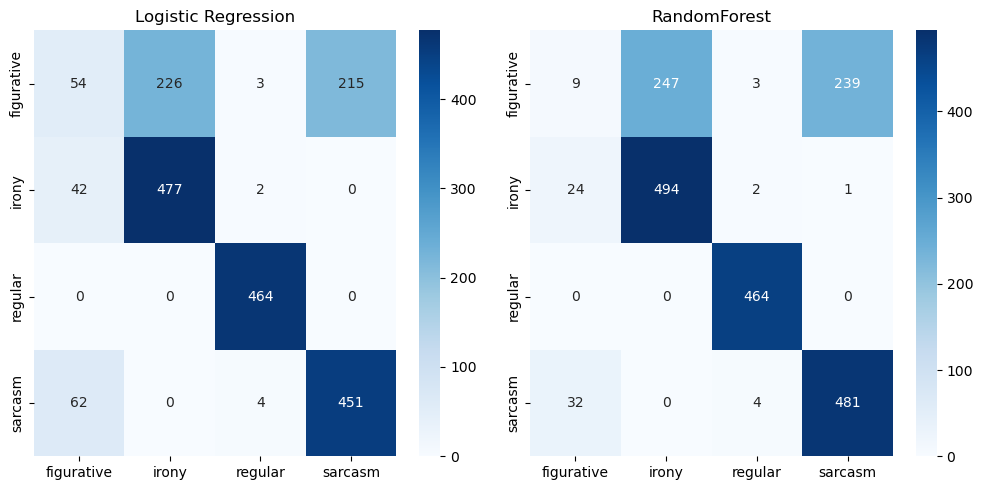

In [23]:
plt.figure(figsize=(15, 5))
class_labels=['figurative','irony','regular','sarcasm']
plt.subplot(1, 3, 1)
sns.heatmap(le_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Logistic Regression")

plt.subplot(1, 3, 2)
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("RandomForest")


plt.tight_layout()
plt.show()


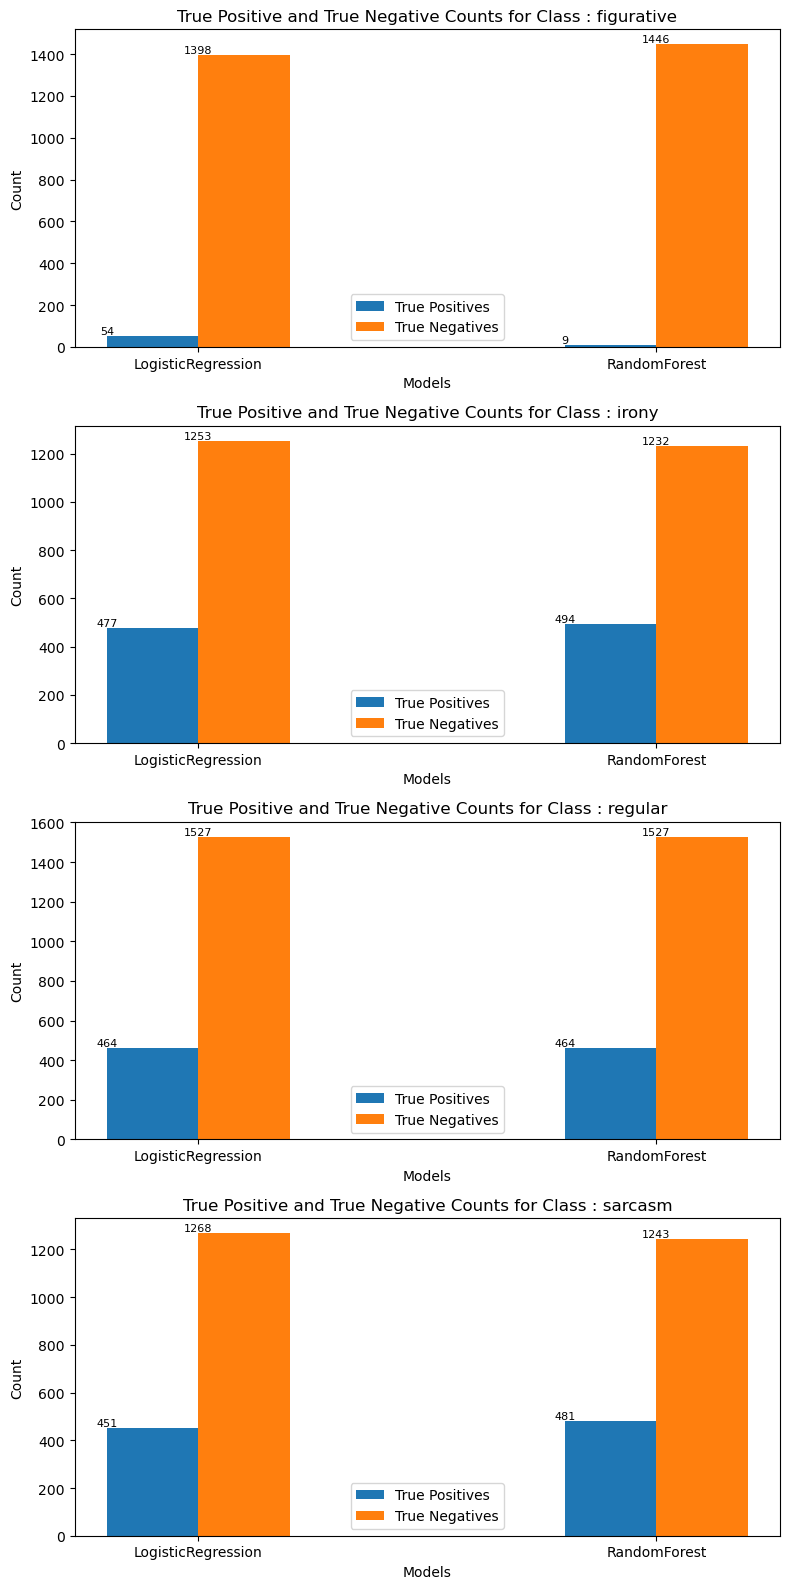

In [25]:
# Extract true positives and true negatives for each class and model
def extract_tp_tn(conf_matrix):
    true_positives = np.diag(conf_matrix)
    true_negatives = np.sum(conf_matrix) - np.sum(conf_matrix, axis=0) - np.sum(conf_matrix, axis=1) + true_positives
    return true_positives, true_negatives

# Extract true positives and true negatives for each class and model
true_positives_model1, true_negatives_model1 = extract_tp_tn(le_conf_matrix)
true_positives_model2, true_negatives_model2 = extract_tp_tn(rf_conf_matrix)
#true_positives_model3, true_negatives_model3 = extract_tp_tn(xgb_conf_matrix)

# List of model names
model_names = ["LogisticRegression", "RandomForest"]
class_names=['figurative','irony','regular','sarcasm']

# Create subplots for true positives and true negatives
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 16))

bar_width = 0.2
index = np.arange(len(model_names))

# Iterate over each class
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    true_positives = [true_positives_model1[i], true_positives_model2[i]]
    true_negatives = [true_negatives_model1[i], true_negatives_model2[i]]
    
    ax.bar(index, true_positives, width=bar_width, label='True Positives')
    ax.bar(index + bar_width, true_negatives, width=bar_width, label='True Negatives')

    ax.set_xlabel('Models')
    ax.set_ylabel('Count')
    ax.set_title(f'True Positive and True Negative Counts for Class : {class_names[i]}')
    ax.set_xticks(index + bar_width/2)
    ax.set_xticklabels(model_names)
    ax.legend()
    for j, (tp, tn) in enumerate(zip(true_positives, true_negatives)):
        ax.text(index[j] - bar_width/2, tp, str(tp), ha='center', va='bottom', fontsize=8, color='black')
        ax.text(index[j] + bar_width/2, tn, str(tn), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


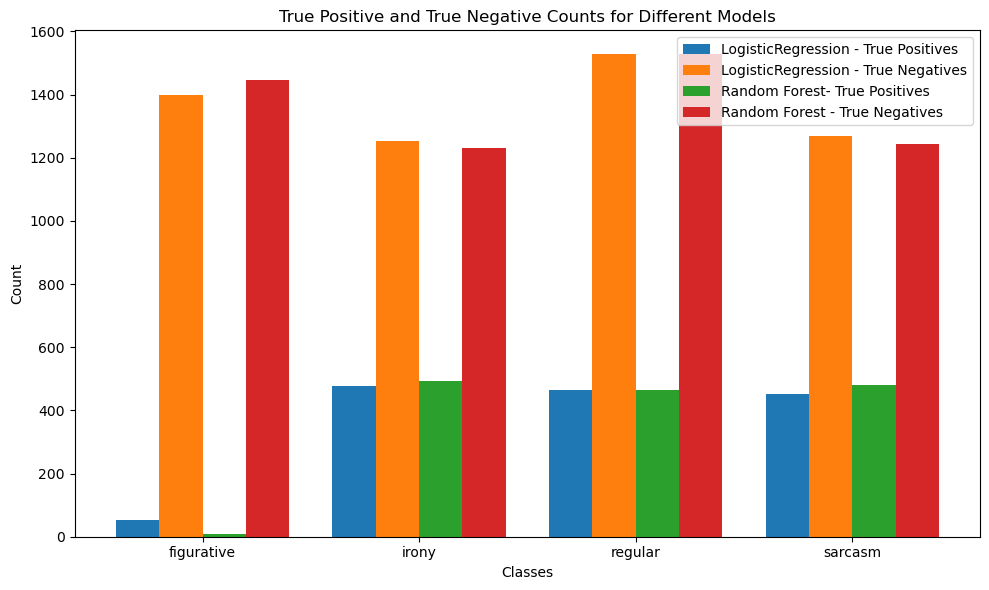

In [26]:

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(class_names))

ax.bar(index, true_positives_model1, width=bar_width, label='LogisticRegression - True Positives')
ax.bar(index + bar_width, true_negatives_model1, width=bar_width, label='LogisticRegression - True Negatives')

ax.bar(index + 2 * bar_width, true_positives_model2, width=bar_width, label='Random Forest- True Positives')
ax.bar(index + 3 * bar_width, true_negatives_model2, width=bar_width, label='Random Forest - True Negatives')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('True Positive and True Negative Counts for Different Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(class_names)
ax.legend()


plt.tight_layout()
plt.show()







In [27]:
# Assuming you have the ground truth labels in y_test and predicted labels in le_ypred
wrongly_classified_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_test, le_ypred)) if true_label != pred_label]

print("Indices of Wrongly Classified Data Points:", wrongly_classified_indices)


Indices of Wrongly Classified Data Points: [0, 2, 5, 8, 9, 12, 16, 17, 24, 28, 30, 37, 43, 44, 46, 47, 49, 55, 59, 60, 64, 72, 73, 77, 82, 96, 98, 114, 119, 121, 124, 127, 134, 137, 143, 148, 150, 157, 161, 163, 164, 170, 171, 173, 177, 179, 181, 182, 187, 188, 189, 192, 194, 196, 202, 208, 211, 213, 226, 227, 232, 234, 235, 237, 238, 239, 241, 248, 251, 255, 257, 260, 266, 269, 272, 273, 276, 278, 280, 281, 290, 292, 295, 300, 307, 313, 315, 319, 322, 350, 352, 357, 358, 366, 369, 376, 377, 380, 381, 391, 394, 402, 403, 405, 407, 412, 414, 418, 422, 426, 428, 429, 430, 431, 437, 438, 442, 443, 446, 451, 452, 453, 454, 455, 471, 474, 476, 477, 496, 498, 499, 501, 511, 517, 520, 521, 522, 526, 528, 530, 536, 540, 545, 546, 547, 553, 554, 557, 572, 574, 581, 586, 587, 589, 597, 601, 604, 614, 618, 620, 623, 627, 633, 634, 638, 648, 649, 654, 659, 665, 667, 671, 673, 674, 687, 692, 694, 695, 698, 703, 707, 710, 711, 712, 717, 720, 725, 726, 732, 733, 735, 737, 738, 745, 750, 751, 760, 764

In [28]:
wrongly_classified_data = [X_test[i] for i in wrongly_classified_indices]
for index, data_point in zip(wrongly_classified_indices, wrongly_classified_data):
    print(f"Index {index}: Wrongly Classified Data Point = {data_point}")


Index 0: Wrongly Classified Data Point =   (0, 16548)	0.3359878527715809
  (0, 15661)	0.3359878527715809
  (0, 11318)	0.30364015164619257
  (0, 6855)	0.29720367573005685
  (0, 10361)	0.5208747105483954
  (0, 1210)	0.2604373552741977
  (0, 2726)	0.2604373552741977
  (0, 17040)	0.20947931616197182
  (0, 1774)	0.2604373552741977
  (0, 12461)	0.21419335880064405
  (0, 12347)	0.15169426109416784
  (0, 8636)	0.0783078486633392
Index 2: Wrongly Classified Data Point =   (0, 13984)	0.3663689841092315
  (0, 13348)	0.4897662805877749
  (0, 17978)	0.39756113845721486
  (0, 12080)	0.38962844124695906
  (0, 4355)	0.2254746538516562
  (0, 1017)	0.3221024509707429
  (0, 6517)	0.29163510676885984
  (0, 9687)	0.21724013366682773
  (0, 8626)	0.1708931163490949
Index 5: Wrongly Classified Data Point =   (0, 11343)	0.4467492751605739
  (0, 10025)	0.4467492751605739
  (0, 3449)	0.3321035721891607
  (0, 13147)	0.3712009856719106
  (0, 8915)	0.32457696128253766
  (0, 12630)	0.2870943779988188
  (0, 17471)	0.

In [29]:
# Inverse transform the sparse matrix to get the original text data
original_data_point = tfidf_vectorizer.inverse_transform(data_point)

# Convert the sparse matrix representation to a list of terms
original_terms_list = list(original_data_point[0])

# Join the terms to reconstruct the original text
original_text = ' '.join(original_terms_list)

print("Original Text Data Point:")
print(original_text)

Original Text Data Point:
dontforgivecorruptppp crook asset bb near gave party death life let never ironic
